In [1]:
import pynr as nr
import matplotlib.pyplot as plt

Show the metadata keys of each NR code

In [2]:
nr.nr_metadata_keys('RIT',nr_type='BBH')

dict_keys(['catalog-tag', 'resolution-tag', 'id-tag', 'run-name', 'data-type', 'system-type', 'comments', 'authors-emails', 'simulation-bibtex-keys', 'code-bibtex-keys', 'initial-data-bibtex-keys', 'quasicircular-bibtex-keys', 'eccentricity-bibtex-keys', 'extrapolation-bibtex-keys', 'code', 'evolution-system', 'evolution-gauge', 'cfl', 'fd-order', 'dissipation-order', 'eccentricity-measurement-method', 'eccentricity', 'freq-start-22', 'freq-start-22-Hz-1Msun', 'number-of-cycles-22', 'number-of-orbits', 'initial-data-type', 'initial-ADM-energy', 'initial-orbital-angular-momentum', 'initial-ADM-angular-momentum-x', 'initial-ADM-angular-momentum-y', 'initial-ADM-angular-momentum-z', 'initial-separation', 'initial-mass1', 'initial-mass2', 'initial-total-mass', 'initial-bh-chi1z', 'initial-bh-chi2z', 'relaxed-time', 'relaxed-mass1', 'relaxed-mass2', 'relaxed-total-mass', 'relaxed-mass-ratio-1-over-2', 'relaxed-LNhatx', 'relaxed-LNhaty', 'relaxed-LNhatz', 'relaxed-nhatx', 'relaxed-nhaty', 'r

In [3]:
nr.nr_metadata_keys('SXS',nr_type='BBH')

dict_keys(['url', 'simulation_name', 'alternative_names', 'initial_data_type', 'object_types', 'number_of_orbits', 'reference_mass_ratio', 'reference_chi_eff', 'reference_chi1_perp', 'reference_chi2_perp', 'reference_eccentricity', 'reference_dimensionless_spin1', 'reference_dimensionless_spin2', 'reference_orbital_frequency', 'reference_mass1', 'reference_mass2', 'reference_time', 'reference_position1', 'reference_position2', 'reference_mean_anomaly', 'keywords', 'point_of_contact_email', 'authors_emails', 'simulation_bibtex_keys', 'code_bibtex_keys', 'initial_data_bibtex_keys', 'quasicircular_bibtex_keys', 'initial_separation', 'initial_orbital_frequency', 'initial_adot', 'object1', 'object2', 'initial_ADM_energy', 'initial_ADM_linear_momentum', 'initial_ADM_angular_momentum', 'initial_mass1', 'initial_mass2', 'initial_dimensionless_spin1', 'initial_dimensionless_spin2', 'initial_position1', 'initial_position2', 'relaxation_time', 'common_horizon_time', 'remnant_mass', 'remnant_dimen

In [4]:
nr.nr_metadata_keys('MAYA',nr_type='BBH')

dict_keys(['GTID', 'GT_Tag', 'q', 'a1x', 'a1y', 'a1z', 'a2x', 'a2y', 'a2z', 'af', 'mf', 'Momega'])

In [6]:
maya_conditions=['BBH',['q',[2,4]],['af',[0.7,0.9]]]
maya_selection=nr.nr_catalogue_select(maya_conditions,code='MAYA',verbose=True)

            Tag      q       af
0   GT:BBH:0428  2.00   0.8095 
1   GT:BBH:0430  4.00   0.7794 
2   GT:BBH:0432  4.00   0.7585 
3   GT:BBH:0458  2.00   0.7223 
4   GT:BBH:0459  2.50   0.7151 
5   GT:BBH:0460  2.00   0.8045 
6   GT:BBH:0461  2.00   0.7766 
7   GT:BBH:0465  2.50   0.7875 
8   GT:BBH:0466  2.50   0.7563 
9   GT:BBH:0468  4.00   0.7485 
10  GT:BBH:0469  4.00   0.7148 
11  GT:BBH:0472  2.00   0.7697 
12  GT:BBH:0480  2.50   0.7312 
13  GT:BBH:0578  4.00   0.7784 
14  GT:BBH:0587  2.00   0.7175 
15  GT:BBH:0588  2.00   0.8387 
16  GT:BBH:0596  3.00   0.7126 
17  GT:BBH:0600  3.00   0.7957 
18  GT:BBH:0603  3.00   0.7552 
19  GT:BBH:0607  3.00   0.7176 
20  GT:BBH:0613  3.00   0.7178 
21  GT:BBH:0626  3.00   0.7189 
22  GT:BBH:0628  2.50   0.7499 
23  GT:BBH:0630  2.50   0.7762 
24  GT:BBH:0645  2.50   0.7241 
25  GT:BBH:0646  2.50   0.7585 
26  GT:BBH:0647  2.50   0.8047 
27  GT:BBH:0648  2.50   0.7970 
28  GT:BBH:0649  2.50   0.7833 
29  GT:BBH:0666  2.50   0.7947 
30  GT:B

Select the NR according to a certain parameter range 

In [7]:
sxs_conditions=['BBH',['reference_mass_ratio',[2,4]],['remnant_dimensionless_spin',[0.7,0.9]],['reference_chi_eff',[0.2,0.4]]]
sxs_selection=nr.nr_catalogue_select(sxs_conditions,code='SXS',verbose=True)

             Tag  reference_mass_ratio                         remnant_dimensionless_spin  reference_chi_eff
0   SXS:BBH:0031              3.001326  [-1.72916805313e-08, -8.27039434208e-09, 0.755...           0.374702
1   SXS:BBH:0033              3.001262  [0.0925073095404, 0.00694581930202, 0.73287879...           0.324111
2   SXS:BBH:0041              3.001324  [-1.11137733299e-07, 6.61033598023e-08, 0.7550...           0.374693
3   SXS:BBH:0043              3.001285  [0.110356204651, 0.00625487601903, 0.731014823...           0.324302
4   SXS:BBH:0045              2.999804  [-1.5831243272e-08, -2.26826286557e-08, 0.7410...           0.249803
5   SXS:BBH:0048              2.999806  [0.0230026946098, -0.00238207171617, 0.7550623...           0.374590
6   SXS:BBH:0051              2.999804  [-0.0230150191869, 0.00242102062741, 0.7550582...           0.374582
7   SXS:BBH:0104              2.999804  [-0.0229698791899, 0.00234673671278, 0.7551151...           0.374582
8   SXS:BBH:0174   

In [8]:
rit_conditions=['BBH',['relaxed-mass-ratio-1-over-2',[0.3,1]],['final-chi',[0,1]],['eccentricity',[0,0.5]]]
rit_selection=nr.nr_catalogue_select(rit_conditions,code='RIT',verbose=True)

              Tag relaxed-mass-ratio-1-over-2     final-chi  eccentricity
0    RIT:BBH:0348           0.600021233110695  0.5136755163  0.0014409817
1    RIT:BBH:0949           0.999994234533009  0.7311311487  0.0009138657
2    RIT:BBH:0827            0.59980006990024  0.6861153537  0.0020615387
3    RIT:BBH:0402           0.600096215759514  0.8526335314  0.0009536762
4    RIT:BBH:0036           0.500108708314353  0.9027193189  0.0021756908
..            ...                         ...           ...           ...
766  RIT:BBH:0893           0.924819535519753  0.8402056334  0.0012358844
767  RIT:BBH:0304            0.66676002292701  0.5492698211  0.0013724038
768  RIT:BBH:0520           0.818549674547101  0.6315784761  0.0018406786
769  RIT:BBH:1001           0.550012191507429  0.3354938879  0.0015005994
770  RIT:BBH:0292           0.666724283089485  0.9063062691  0.0012393530

[771 rows x 4 columns]


In [9]:
nr.nr_waveform?

Signature:
nr.nr_waveform(
    download_Q=True,
    root_folder=None,
    pycbc_format=True,
    modes=[[2, 2], [2, -2]],
    distance=100,
    inclination=0,
    coa_phase=0,
    modes_combined=True,
    tapering=True,
    RD=False,
    zero_align=True,
    extrapolation_order=2,
    resolution_level=-1,
    **args,
)
Docstring:
Function to load the waveforms from the NR catalogues. 

    Parameters
----------
code: {'SXS','RIT','MAYA'}. Select the catalogue you want the data from.
tag: eg. {'SXS:BBH:0305','RIT-BBH-0001','GT0001'}. Tag of the target waveform.
download_Q: logical, optional, Default = True. If True downloads the data from the catalogue url.
root_folder: string, optional, Default = None. If download_Q = False, it must be provided.
pycbc_format: logical, optional, Default=True. If True it provides hp, hc in the Timeseries format.

mass: Total mass in solar masses. 
modes: list of modes, optional, Default= [[2,2],[2,-2]].
distance: Distance, optional, Default = 100 Mpc.
in

In [10]:
hp_rit,hx_rit= nr.nr_waveform(code='RIT',
                              pycbc_format=True,
    rit_root_folder='/work/francisco.jimenez/RIT/Data',
    download_Q = True,
    tag = 'RIT:BBH:0001',
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/1024,
    tapering = False,
    RD = False,
    zero_align = True)

Extracting and combining modes


In [11]:
hp_sxs,hx_sxs= nr.nr_waveform(code='SXS',pycbc_format=True,
    download_Q = True,
    tag = 'SXS:BBH:0305',
    extrapolation_order = 2,
    resolution_level = -1,
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/1024,
    tapering = False,
    RD = False,
    zero_align = True )

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer


/work/francisco.jimenez/venv_sc/lib/python3.7/site-packages/sxs/waveforms/nrar.py:173: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


Extracting and combining modes


In [12]:
hp_maya,hx_maya= nr.nr_waveform(code='MAYA',pycbc_format=True,
    download_Q = True,
    tag = 'GT0229',
    modes  = [[2,2],[2,-2]],
    mass  = 100,
    distance  = 100,
    inclination = 0,
    coa_phase = 0,
    modes_combined = True,
    delta_t = 1/1024,
    tapering = False,
    RD = False,
    zero_align = True )

Extracting and combining modes


Plot the data

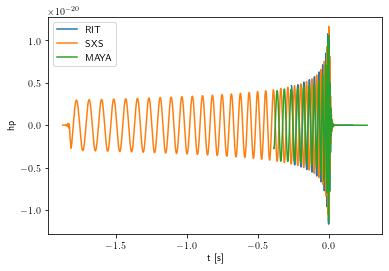

In [13]:
plt.plot(hp_rit.sample_times,hp_rit,label='RIT')
plt.plot(hp_sxs.sample_times,hp_sxs,label='SXS')
plt.plot(hp_maya.sample_times,hp_maya,label='MAYA')

plt.xlabel('t [s]')
plt.ylabel('hp')
plt.legend()
plt.show()